# **Práctica Deep Learning: Joanybel Ortiz**

Para la predicción del precio de un piso de Airbnb he realizado 3 estudios en este notebook:
- **1 Modelo Perceptrón Multicapas (MLP)** Se aplica regresión y podremos predecir en este caso el precio de un piso de airbnb.  MLP lo utilizamos para procesar nuestros datos numéricos y categóricos del dataset que previamente debemos limpiar, categorizar y normalizar. 
- **2 Modelo Convolutional Neural Networks (CNN)** Para el procesado de imágenes. La CNN es un tipo de Red Neuronal Artificial con aprendizaje supervisado que procesa sus capas imitando al cortex visual del ojo humano para identificar distintas características en las entradas que en definitiva hacen que pueda identificar objetos y “ver”. En este notebook he realizado previamente la selección de 1000 imágenes, las he reescalado y normalizado para poder luego pasarlas por mi CNN que debe terminar en 1 neurona. La última línea la podemos dejar comentada para quedarnos con 4 neuronas y de esta forma poder concatenar con la MLP más adelante. 
- **3 Modelo VGG16 (híbdrido)** Una estrategia para lidiar en redes neuronales profundas es usar redes previamente preentrenadas con bases de datos grandes y adaptarlas al problema de nuestro interés. Las razones que por la que usamos VGG16 son las siguientes:

  - Tiene una arquitectura fácil de comprender y, en su caso, de implementar.
  - Logra un excelente resultado en la competencia ImageNet (ILSVRC-2014), entre el 96% y 97%.
  - Contienen relativamente pocas capas convolucionales: 13 capas convolucionales y 3 densas, de ahí que en sus nombre incluya el 16.
  - La red (modelo y pesos entrenados) esta diponible en Kera.

Este modelo híbrido nos permitirá obtener resultados al unir los datos numéricos, categóricos e imágenes. Sería como el resultado que podrías obtener si unimos la MLP y la CNN. 

## **Descarga del Dataset**

In [1]:
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2022-06-18 15:16:53--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.248.20.69, 34.249.199.226
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [        <=>         ]  54.31M   646KB/s    in 1m 55s  

2022-06-18 15:18:57 (485 KB/s) - ‘airbnb-listings.csv’ saved [56950929]



In [2]:
!ls -lah

total 55M
drwxr-xr-x 1 root root 4.0K Jun 18 10:21 .
drwxr-xr-x 1 root root 4.0K Jun 18 10:13 ..
-rw-r--r-- 1 root root  55M Jun 18 15:18 airbnb-listings.csv
drwxr-xr-x 4 root root 4.0K Jun 15 13:41 .config
drwxr-xr-x 1 root root 4.0K Jun 15 13:42 sample_data


In [3]:
# Leemos el dataset con pandas y mostramos los 5 primeros registros
import pandas as pd
data = pd.read_csv('airbnb-listings.csv', sep = ';')
data.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,3150371,https://www.airbnb.com/rooms/3150371,20170407214119,2017-04-08,Double room + bathroom - La Latina,"Double room with own bathroom in La Latina, in...",The apartment is spacious and cozy. It is 90 m...,"Double room with own bathroom in La Latina, in...",none,La Latina is one of the most famous neighbourh...,...,10.0,10.0,10.0,NaN,NaN,flexible,1,2.33,"40.41010608050749,-3.714754034177323","Host Has Profile Pic,Host Identity Verified,Is..."
1,3378181,https://www.airbnb.com/rooms/3378181,20170407214119,2017-04-08,"Ópera/Plz Mayor -- A/C, elevator",Old world charm meets modern comfort in our ne...,"Designed with the traveler in mind, our one-be...",Old world charm meets modern comfort in our ne...,none,The neighborhood is steeped in history and clo...,...,10.0,10.0,10.0,NaN,NaN,strict,2,2.69,"40.416968822636726,-3.7094389211089993","Host Has Profile Pic,Host Identity Verified,Is..."
2,2070750,https://www.airbnb.com/rooms/2070750,20170407214119,2017-04-08,Centric room with a balcony,Lominous room for rent in the heart of the old...,Lominous room for rent in the heart of the old...,Lominous room for rent in the heart of the old...,none,-,...,9.0,10.0,9.0,NaN,NaN,flexible,4,0.60,"40.40970517560235,-3.7135611928841086","Host Has Profile Pic,Host Identity Verified,Is..."
3,9832499,https://www.airbnb.com/rooms/9832499,20170407214119,2017-04-08,PLAZA DE ESPAÑA - Único - Gimnasio.,"Ubicado en el famoso edificio Torre de Madrid,...","Ubicado en el famoso edificio Torre de Madrid,...","Ubicado en el famoso edificio Torre de Madrid,...",none,NaN,...,10.0,10.0,10.0,VT-1520,NaN,strict,9,3.56,"40.42319271738103,-3.7112486513892","Host Is Superhost,Host Has Profile Pic,Host Id..."
4,1868170,https://www.airbnb.com/rooms/1868170,20170407214119,2017-04-08,"Loft/duplex 150m2, 3 double rooms","Huge, open plan spacious apartment in the cent...","Huge, open plan spacious apartment in the cent...","Huge, open plan spacious apartment in the cent...",none,NaN,...,10.0,10.0,9.0,NaN,NaN,moderate,1,1.13,"40.416513932601625,-3.7178427529546973","Host Is Superhost,Host Has Profile Pic,Host Id..."


In [4]:
# vamos a ver de cuantos registros disponemos y de cuantas variables
data.shape

(14001, 89)

In [5]:
# Variables con las que disponemos
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [6]:
import imageio as io
import numpy as np
import cv2
n_images = 1000
images = np.zeros((n_images, 224, 224, 3), dtype=np.uint8)
urls = data['Thumbnail Url']

i_aux = 0
good_urls = []
for i_img, url in enumerate(urls):
    if len(good_urls) >= n_images:
        # ya tenemos n_images imágenes
        break
    try:
        img = io.imread(url)
        images[i_aux] = cv2.resize(img, (224, 224))
        good_urls.append(i_img)
        i_aux += 1
        print(f'Imagen {i_img} descargada')
    except IOError as err:
        pass

Imagen 0 descargada
Imagen 1 descargada
Imagen 2 descargada
Imagen 3 descargada
Imagen 4 descargada
Imagen 5 descargada
Imagen 6 descargada
Imagen 7 descargada
Imagen 8 descargada
Imagen 9 descargada
Imagen 10 descargada
Imagen 11 descargada
Imagen 12 descargada
Imagen 13 descargada
Imagen 14 descargada
Imagen 15 descargada
Imagen 16 descargada
Imagen 18 descargada
Imagen 19 descargada
Imagen 20 descargada
Imagen 21 descargada
Imagen 22 descargada
Imagen 23 descargada
Imagen 24 descargada
Imagen 25 descargada
Imagen 27 descargada
Imagen 33 descargada
Imagen 34 descargada
Imagen 35 descargada
Imagen 36 descargada
Imagen 37 descargada
Imagen 41 descargada
Imagen 42 descargada
Imagen 43 descargada
Imagen 44 descargada
Imagen 45 descargada
Imagen 46 descargada
Imagen 47 descargada
Imagen 48 descargada
Imagen 49 descargada
Imagen 51 descargada
Imagen 54 descargada
Imagen 56 descargada
Imagen 57 descargada
Imagen 58 descargada
Imagen 59 descargada
Imagen 60 descargada
Imagen 61 descargada
Im

In [7]:
# mantenemos los datos numéricos solo para aquellos pisos que tienen imágenes 
# y las hemos obtenido
final_data = data.iloc[good_urls, :]

In [9]:
final_data.shape

(1000, 89)

In [10]:
#Tamaño del DF con Imágenes
print(images.shape)

(1000, 224, 224, 3)


In [11]:
# seleccionamos la que será nuestra etiqueta
y_reg = final_data['Price']
y_reg.shape

(1000,)

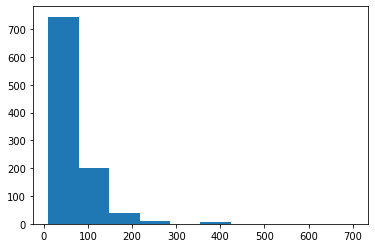

In [12]:
# y un rango para clasificación (del 1 al 3 por ejemplo: barato, normal, caro)
import matplotlib.pyplot as plt
plt.hist(y_reg, bins=10)
plt.show()

# **Limpieza de Variables**

In [ ]:
#Inicio la limpieza de las variables. Como este dataset ya lo conocemos comentaré por qué eliminaré ciertas variables.
#Para empezar eliminaré estas, ya que sin necesidad de explorarlas sabemos que no son relevantes para la predicción del precio de los pisos en Airbnb

# Eliminamos las columnas que no aportan nada en este caso como las URLs, descripciones y datos relacionados a la extracción de los datos.
# Ésta eliminación inicial la hago ya que entre menos variables inútiles tengamos mejor será el tiempo de ejecución
# y procesamiento además de simplificar el modelo

In [13]:
final_data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [14]:
final_data.shape

(1000, 89)

In [15]:
#Renombro la variable
df = final_data

## **Elimino las primeras variables que no son relevantes para la predicción del precio**

Anteriormente hemos realizado un estudio a cada variable en ML. [VER](https://github.com/Joaconjoa/KC_Practica_Machine_Learning/blob/main/Practica%20Joanybel%20Ortiz/Pra%CC%81ctica%20ML%20Joanybel%20Ortiz%20%20copia%206.ipynb)

In [16]:
df = df.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count','Host Verifications', 'Street', 'Calendar Updated', 'Calendar last Scraped','First Review', 'Last Review',
       'Calculated host listings count','Reviews per Month', 'License', 'Geolocation', 'Features'],
      axis=1)


print(f'El nuevo dataframe tiene: {df.shape} filas/columnas')

El nuevo dataframe tiene: (1000, 48) filas/columnas


In [17]:
#Se establece que pandas muestre todas las filas del dataframe
pd.set_option('max_rows', None)

In [18]:
df.head().T

,0,1,2,3,4
Thumbnail Url,https://a0.muscache.com/im/pictures/40713802/3...,https://a0.muscache.com/im/pictures/44239584/c...,https://a0.muscache.com/im/pictures/84378550/f...,https://a0.muscache.com/im/pictures/be441d1f-4...,https://a0.muscache.com/im/pictures/c232f016-f...
Host Acceptance Rate,NaN,NaN,NaN,NaN,NaN
Host Total Listings Count,1.0,3.0,4.0,10.0,1.0
Neighbourhood,Palacio,Palacio,La Latina,Malasaña,Palacio
Neighbourhood Cleansed,Palacio,Palacio,Palacio,Palacio,Palacio
Neighbourhood Group Cleansed,Centro,Centro,Centro,Centro,Centro
City,Madrid,Madrid,Madrid,Madrid,Madrid
State,Community of Madrid,Community of Madrid,Community of Madrid,Comunidad de Madrid,Community of Madrid
Zipcode,28005,28013,NaN,NaN,28005
Market,Madrid,Madrid,Madrid,Madrid,Madrid


## **Análisis Exploratorio**

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Acceptance Rate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Host Total Listings Count,1000.0,12.238000,34.735024,0.000000,1.000000,2.000000,5.00000,207.000000
Latitude,1000.0,40.434967,0.171365,39.367731,40.409842,40.417941,40.42776,41.409206
Longitude,1000.0,-3.492515,1.099295,-3.783810,-3.708285,-3.701777,-3.69353,3.117266
Accommodates,1000.0,3.204000,2.043174,1.000000,2.000000,3.000000,4.00000,16.000000
Bathrooms,997.0,1.257272,0.633930,0.000000,1.000000,1.000000,1.00000,8.000000
Bedrooms,997.0,1.302909,0.801931,0.000000,1.000000,1.000000,2.00000,6.000000
Beds,996.0,2.020080,1.651434,1.000000,1.000000,1.000000,2.00000,16.000000
Square Feet,40.0,360.325000,481.573883,0.000000,0.000000,28.000000,659.50000,1938.000000
Price,1000.0,64.512000,52.465136,10.000000,30.000000,52.000000,79.00000,700.000000


In [ ]:
#Este es un análisis visual del cuadro anterior:

#Accommodates y Beds parecen tener outlier, analizando es posible que no sea un error ya que el max de Accommodates 
#es 16 y en Beds es 16, sin embargo la media de estas variables es 3,20 y 2,02. Este sería un alojamiento que no se acerca
#a la media pero no podemos afirmar que sea un outlier por tanto seguiremos analizando.
#Bedrooms tiene una media de 1.30 habitación y un máximo de 6
#Square Feet tiene una media de 360.32 y un máximo de 1938
#Price tiene una media de 64.51€ y un máximo de 700€
#Extra People tiene una media de 7,13 y un máximo de 105.
#Security Deposit: Tiene una media de 184.25 y un máximo de 900
#Cleaning Fee: Tiene 27.73 de media y 150 de máximo 

#Como este dataset lo conozco, se que el outlier en longitud se debían ha que hay datos de otros países
#Sin embargo la mayoría de los datos pertenecen a alojamientos ubicados en Madrid. Por lo que limpiaré la variable city y
#reducir el dataset solo a los alojamientos de Madrid ya que de este modo tiene más sentido el cálculo del
#precio en relación al resto de variables.

In [20]:
#Estas celdas las comento porque he decidido no segmentar a solo Madrid el estudio. Queda como info adicional en caso de 
#Querer realizarlo posteriormente. La razón principal es porque de esta forma continúo teniendo la misma cantidad de índices
#print('Total de alojamientos del dataset: ',df.shape[0])
#df = df[df['City']=='Madrid']
#print('Total de alojamientos en Madrid: ',df.shape[0])


#Elimino las siguientes variables ya que solo usaré los alojamientos de Madrid 
#Elimino Neighbourhood y Neighbourhood Group Cleansed y me quedo con Neighbourhood Cleansed que no tiene nulls
#Elimino Zipcode ya que contiene nulos, NAs y errores además que con Neighbourhood Cleansed podré conocer los barrios

df = df.drop(['City', 'State', 'Zipcode', 'Market', 'Neighbourhood','Neighbourhood Cleansed', 'Neighbourhood Group Cleansed',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude'], axis=1)


df.head().T

,0,1,2,3,4
Thumbnail Url,https://a0.muscache.com/im/pictures/40713802/3...,https://a0.muscache.com/im/pictures/44239584/c...,https://a0.muscache.com/im/pictures/84378550/f...,https://a0.muscache.com/im/pictures/be441d1f-4...,https://a0.muscache.com/im/pictures/c232f016-f...
Host Acceptance Rate,NaN,NaN,NaN,NaN,NaN
Host Total Listings Count,1.0,3.0,4.0,10.0,1.0
Property Type,Apartment,Apartment,Apartment,Apartment,Apartment
Room Type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
Accommodates,2,2,2,4,8
Bathrooms,1.0,1.0,1.0,1.0,3.0
Bedrooms,1.0,1.0,1.0,1.0,3.0
Beds,1.0,1.0,1.0,2.0,4.0
Bed Type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed


In [21]:
df.shape

(1000, 36)

## **Verifico si hay o no NAs**

In [22]:
df.isna().sum()

Thumbnail Url                     0
Host Acceptance Rate           1000
Host Total Listings Count         0
Property Type                     0
Room Type                         0
Accommodates                      0
Bathrooms                         3
Bedrooms                          3
Beds                              4
Bed Type                          0
Amenities                        13
Square Feet                     960
Price                             0
Weekly Price                    764
Monthly Price                   760
Security Deposit                567
Cleaning Fee                    404
Guests Included                   0
Extra People                      0
Minimum Nights                    0
Maximum Nights                    0
Has Availability               1000
Availability 30                   0
Availability 60                   0
Availability 90                   0
Availability 365                  0
Number of Reviews                 0
Review Scores Rating        

In [23]:
#Elimino las siguientes variables: Square feet, Has Availability y Jurisdiction Names ya que más del 95% de los datos que contienen son Nulos
#Weekly Price ya que el 75,6% de los datos que contiene son Nulos 
#Monthly Price ya que el 75,7% de los datos que contiene son Nulos 
#Security Deposit ya que el 59% de los datos que contiene son Nulos
#Host Acceptance Rate ya que el 99,7% de los datos que contiene son Nulos 
# Y el resto de variables que considero que no son relevantes para el esrtudio

df = df.drop(['Square Feet', 'Security Deposit', 'Has Availability','Amenities', 'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365','Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin', 'Cleaning Fee', 'Host Acceptance Rate',
       'Review Scores Communication','Thumbnail Url', 'Review Scores Location', 'Monthly Price', 'Monthly Price',
       'Review Scores Value', 'Jurisdiction Names', 'Weekly Price',], axis=1)

df.head().T


,0,1,2,3,4
Host Total Listings Count,1.0,3.0,4.0,10.0,1.0
Property Type,Apartment,Apartment,Apartment,Apartment,Apartment
Room Type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
Accommodates,2,2,2,4,8
Bathrooms,1.0,1.0,1.0,1.0,3.0
Bedrooms,1.0,1.0,1.0,1.0,3.0
Beds,1.0,1.0,1.0,2.0,4.0
Bed Type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed
Price,36.0,85.0,20.0,112.0,190.0
Guests Included,1,1,1,2,6


In [24]:
missing= df.isnull().sum()
missing[missing>0]

Bathrooms    3
Bedrooms     3
Beds         4
dtype: int64

In [25]:
df['Bathrooms'].fillna(df['Bathrooms'].mean(),inplace=True)
df['Bedrooms'].fillna(df['Bedrooms'].mean(), inplace=True)
df['Beds'].fillna(df['Beds'].mean(), inplace=True)
#df['Price'].fillna(df['Price'].mean(), inplace=True)


missing=df.isnull().sum()
missing[missing>0]

Series([], dtype: int64)

In [26]:
df.isna().sum()

Host Total Listings Count    0
Property Type                0
Room Type                    0
Accommodates                 0
Bathrooms                    0
Bedrooms                     0
Beds                         0
Bed Type                     0
Price                        0
Guests Included              0
Extra People                 0
Minimum Nights               0
Maximum Nights               0
Number of Reviews            0
Cancellation Policy          0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1237
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Host Total Listings Count  1000 non-null   float64
 1   Property Type              1000 non-null   object 
 2   Room Type                  1000 non-null   object 
 3   Accommodates               1000 non-null   int64  
 4   Bathrooms                  1000 non-null   float64
 5   Bedrooms                   1000 non-null   float64
 6   Beds                       1000 non-null   float64
 7   Bed Type                   1000 non-null   object 
 8   Price                      1000 non-null   float64
 9   Guests Included            1000 non-null   int64  
 10  Extra People               1000 non-null   int64  
 11  Minimum Nights             1000 non-null   int64  
 12  Maximum Nights             1000 non-null   int64  
 13  Number of Reviews          1000 non-null   int64

## **Tratamiento de Outliers**
Esta parte NO la ejecutaré. Queda como info adicional en vista de que el proceso de limpieza de los índices en el DF de imágenes se complicaba al eliminar índices del DF numérico por la diferencia de registros. 

[Ver estudio anterior en ML](https://github.com/Joaconjoa/KC_Practica_Machine_Learning/blob/main/Practica%20Joanybel%20Ortiz/Pra%CC%81ctica%20ML%20Joanybel%20Ortiz%20%20copia%206.ipynb)

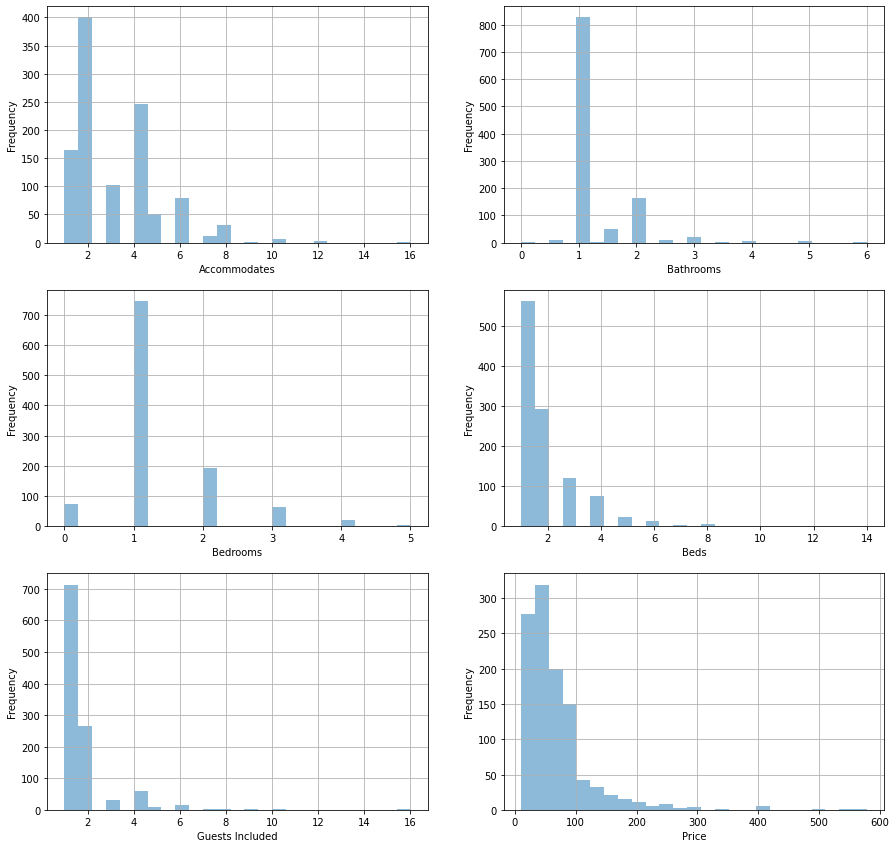

In [ ]:
#Para continuar analizando y entendiendo los datos vamos a representar los histogramas de los atributos
plt.figure(figsize=(15, 20))

plt.subplot(4,2,1)
df['Accommodates'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Accommodates')

plt.subplot(4,2,2)
df['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bathrooms')

plt.subplot(4,2,3)
df['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bedrooms')

plt.subplot(4,2,4)
df['Beds'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Beds')

plt.subplot(4,2,5)
df['Guests Included'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Guests Included')

plt.subplot(4,2,6)
df['Price'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Price')




plt.show()


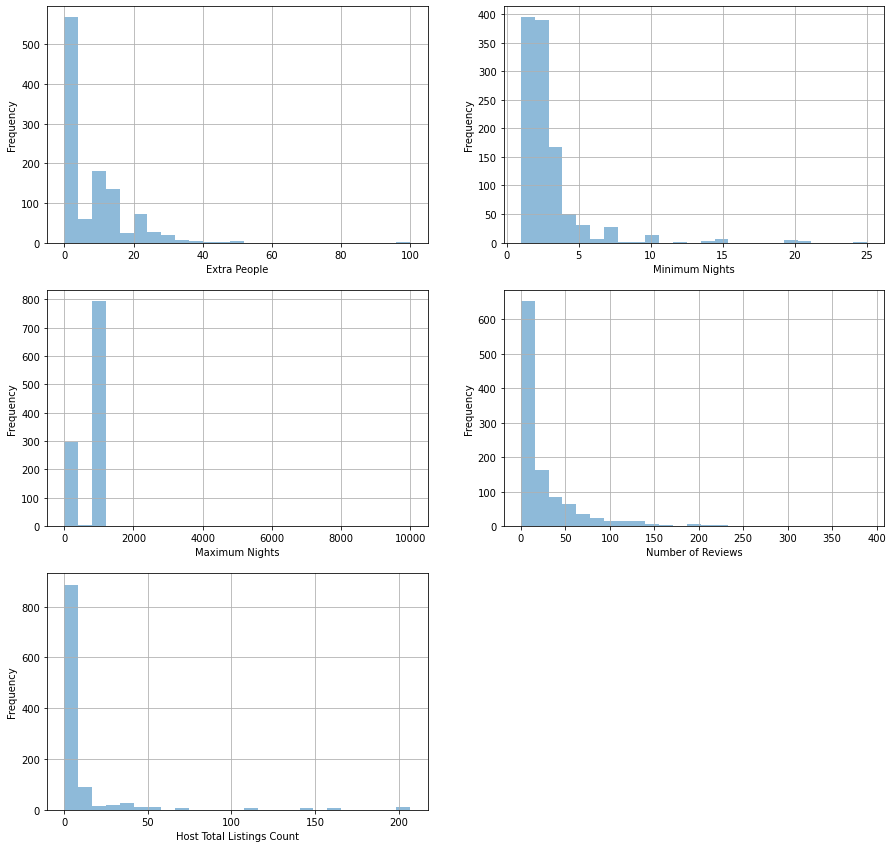

In [ ]:
plt.figure(figsize=(15, 20))

plt.subplot(4,2,1)
df['Extra People'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Extra People')

plt.subplot(4,2,2)
df['Minimum Nights'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Minimum Nights')

plt.subplot(4,2,3)
df['Maximum Nights'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Maximum Nights')

plt.subplot(4,2,4)
df['Number of Reviews'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Number of Reviews')

plt.subplot(4,2,5)
df['Host Total Listings Count'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Host Total Listings Count')


plt.show()

In [ ]:
df['Accommodates'].value_counts()

2     400
4     247
1     165
3     103
6      80
5      50
8      31
7      12
10      7
12      3
16      1
9       1
Name: Accommodates, dtype: int64

In [ ]:
df['Bathrooms'].value_counts()

1.000000    826
2.000000    165
1.500000     51
3.000000     21
2.500000     10
0.500000      9
4.000000      4
5.000000      4
0.000000      3
3.500000      3
1.255697      3
6.000000      1
Name: Bathrooms, dtype: int64

In [ ]:
df.loc[df['Bathrooms']==0,'Bathrooms']=1

In [ ]:
df['Bedrooms'].value_counts()

1.000000    745
2.000000    192
0.000000     72
3.000000     65
4.000000     21
5.000000      3
1.295993      2
Name: Bedrooms, dtype: int64

In [ ]:
#Hay muchos baños en 0, les asignaré el valor de 1
df.loc[df['Bedrooms']==0,'Bedrooms']=1

In [ ]:
df['Beds'].value_counts()

1.000000     563
2.000000     287
3.000000     120
4.000000      76
5.000000      24
6.000000      14
8.000000       5
1.915068       5
7.000000       4
10.000000      1
14.000000      1
Name: Beds, dtype: int64

In [ ]:
df['Guests Included'].value_counts()

1     713
2     264
4      58
3      32
6      15
5      10
7       3
8       2
16      1
10      1
9       1
Name: Guests Included, dtype: int64

In [ ]:
df['Price'].value_counts()

50.0     47
35.0     43
40.0     43
25.0     40
55.0     37
60.0     37
45.0     37
65.0     35
20.0     34
30.0     32
100.0    28
70.0     27
90.0     25
75.0     25
80.0     24
22.0     21
49.0     17
19.0     17
120.0    16
95.0     16
18.0     15
85.0     15
99.0     15
29.0     14
59.0     12
23.0     12
27.0     12
39.0     12
38.0     12
150.0    11
15.0     11
26.0      9
110.0     9
89.0      9
42.0      9
69.0      9
32.0      9
24.0      8
200.0     8
28.0      8
68.0      8
48.0      8
43.0      7
105.0     7
125.0     7
130.0     7
140.0     7
21.0      7
58.0      6
180.0     6
52.0      6
33.0      6
36.0      6
16.0      6
14.0      5
34.0      5
31.0      5
74.0      5
17.0      5
47.0      5
63.0      5
135.0     5
37.0      4
94.0      4
72.0      4
79.0      4
160.0     4
78.0      4
76.0      4
73.0      3
46.0      3
62.0      3
13.0      3
54.0      3
41.0      3
145.0     3
98.0      3
51.0      3
250.0     3
240.0     3
119.0     3
88.0      2
66.0      2
108.

In [ ]:
df['Extra People'].value_counts()

0      568
10     140
15     108
20      69
5       41
8       25
25      23
12      18
30      15
18      13
7       12
19       8
11       8
9        7
6        7
35       6
13       5
50       4
14       3
28       3
17       2
39       2
22       2
45       2
26       2
38       1
27       1
31       1
42       1
100      1
16       1
40       1
Name: Extra People, dtype: int64

In [ ]:
df['Minimum Nights'].value_counts()

1     394
2     390
3     167
4      50
5      31
7      28
10     14
15      7
6       7
20      4
21      2
14      2
25      1
8       1
12      1
9       1
Name: Minimum Nights, dtype: int64

In [ ]:
df['Maximum Nights'].value_counts()

1125     788
30        50
365       34
7         23
15        20
10        15
5         14
3         13
60        13
180       10
20        10
90         9
28         9
4          7
14         7
1000       5
100        5
31         5
40         4
29         4
120        4
50         4
730        3
45         3
300        3
200        3
360        3
8          2
330        2
16         2
185        2
12         1
18         1
350        1
80         1
220        1
59         1
1365       1
55         1
400        1
91         1
10000      1
36         1
32         1
6          1
27         1
62         1
44         1
1825       1
1059       1
5000       1
9          1
1222       1
25         1
99         1
Name: Maximum Nights, dtype: int64

In [ ]:
df['Number of Reviews'].value_counts()

0      202
1       92
2       54
3       41
6       34
4       34
7       28
5       25
12      22
11      20
14      20
16      19
17      18
20      18
8       18
10      17
18      17
15      16
9       15
13      14
19      13
21      12
28      11
27       9
34       8
40       8
31       8
33       8
24       7
46       7
45       7
39       7
36       7
50       7
30       6
22       6
60       6
48       6
23       6
44       6
26       6
49       5
55       5
25       5
32       5
59       5
37       5
41       5
35       5
62       4
95       4
52       4
71       4
72       4
56       4
69       4
67       4
64       4
68       4
86       4
81       3
119      3
29       3
57       3
53       3
43       3
47       3
100      3
75       3
80       3
54       3
51       3
127      3
84       2
58       2
134      2
96       2
128      2
87       2
109      2
63       2
137      2
42       2
90       2
123      2
125      2
78       2
61       2
76       2
97       2
223      2

In [ ]:
df['Host Total Listings Count'].value_counts()

1.0      444
2.0      173
3.0       95
4.0       57
5.0       51
6.0       26
8.0       24
10.0      21
7.0       14
14.0      14
9.0       13
46.0      12
207.0     12
11.0      12
114.0      9
40.0       9
164.0      8
38.0       8
15.0       8
12.0       8
13.0       7
26.0       7
39.0       6
16.0       6
24.0       6
68.0       6
51.0       6
57.0       5
142.0      4
30.0       4
32.0       3
34.0       3
147.0      2
18.0       2
0.0        2
28.0       2
23.0       2
20.0       2
27.0       1
162.0      1
21.0       1
84.0       1
22.0       1
17.0       1
25.0       1
Name: Host Total Listings Count, dtype: int64

In [ ]:
df.shape

(1100, 15)

In [ ]:
df

,Host Total Listings Count,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Cancellation Policy
0,2.0,Loft,Entire home/apt,2,1.000000,1.000000,1.000000,Real Bed,50.0,2,15,2,1125,30,moderate
1,13.0,Apartment,Entire home/apt,4,1.000000,1.000000,2.000000,Real Bed,50.0,2,25,1,1125,97,strict
2,1.0,Apartment,Entire home/apt,4,1.500000,1.000000,2.000000,Real Bed,77.0,1,0,1,1125,7,moderate
4,1.0,Apartment,Entire home/apt,5,1.000000,2.000000,4.000000,Real Bed,95.0,4,0,4,1125,72,strict
7,2.0,Apartment,Private room,2,1.500000,1.000000,1.000000,Real Bed,30.0,1,0,1,1125,2,moderate
11,1.0,Apartment,Private room,2,1.000000,1.000000,1.000000,Real Bed,25.0,1,0,1,1125,0,flexible
13,1.0,Apartment,Entire home/apt,7,2.000000,3.000000,5.000000,Real Bed,150.0,4,25,2,5000,44,moderate
15,9.0,Condominium,Entire home/apt,2,1.000000,1.000000,2.000000,Real Bed,45.0,1,8,2,1125,68,strict
16,1.0,Apartment,Private room,2,1.000000,1.000000,1.000000,Real Bed,37.0,1,0,3,15,14,strict
17,3.0,Apartment,Entire home/apt,2,1.000000,1.000000,1.000000,Real Bed,89.0,1,10,4,1125,33,strict


In [ ]:
#Comento la eliminación de outliers por que está dando problemas al momento de unir indices 
#del df numérico y el df de imágenes. Lo dejo como info adicional de lo que realicé anteriormente
#df1 = df[df['Accommodates'] <= 11]
#df2 = df1[df1['Bathrooms'] <= 6]
#df3 = df2[df2['Bedrooms'] <= 7]
#df4 = df3[df3['Beds'] <= 11]
#df5 = df4[df4['Guests Included'] <= 10]
#df6 = df5[df5['Extra People'] <= 40]
#df7 = df6[df6['Minimum Nights'] <= 25]
#df8 = df7[df7['Number of Reviews'] <= 210]
#df9 = df8[df8['Host Total Listings Count'] <= 220]
#df10 = df9[df9['Price'] >=12 & (df9['Price'] <600)]
#df = df10


In [ ]:
df.shape

## **Categorización de las variables**

In [28]:
# seleccionamos la que será nuestra etiqueta
y_reg = df['Price']
y_reg.shape

(1000,)

In [29]:
# Situación actual
print("Tenemos {} filas y {} columnas".format(df.shape[0], df.shape[1]))

Tenemos 1000 filas y 15 columnas


In [30]:
#Categorizo
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["Cancellation Policy"] = label_encoder.fit_transform(df["Cancellation Policy"])
df["Bed Type"] = label_encoder.fit_transform(df["Bed Type"])
df["Room Type"] = label_encoder.fit_transform(df["Room Type"])
df["Property Type"] = label_encoder.fit_transform(df["Property Type"])


df["Cancellation Policy"]=to_categorical(df["Cancellation Policy"])
df["Bed Type"]=to_categorical(df["Bed Type"])
df["Room Type"]=to_categorical(df["Room Type"])
df["Property Type"]=to_categorical(df["Property Type"])

In [31]:
df.head().T

,0,1,2,3,4
Host Total Listings Count,1.0,3.0,4.0,10.0,1.0
Property Type,1.0,1.0,1.0,1.0,1.0
Room Type,0.0,1.0,0.0,1.0,1.0
Accommodates,2.0,2.0,2.0,4.0,8.0
Bathrooms,1.0,1.0,1.0,1.0,3.0
Bedrooms,1.0,1.0,1.0,1.0,3.0
Beds,1.0,1.0,1.0,2.0,4.0
Bed Type,0.0,0.0,0.0,0.0,0.0
Price,36.0,85.0,20.0,112.0,190.0
Guests Included,1.0,1.0,1.0,2.0,6.0


## **Normalización**

In [32]:
df = df.drop(["Price"], axis=1)

In [33]:
df_Prueba= df

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_Prueba = scaler.fit_transform(df_Prueba)
df_Prueba.max()

1.0

In [35]:
#Normalización del Precio
y_reg=y_reg/y_reg.max()
y_reg.max()

1.0

In [36]:
# Situación actual
print("Tenemos {} filas y {} columnas".format(df_Prueba.shape[0], df_Prueba.shape[1]))

Tenemos 1000 filas y 14 columnas


## **División**

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_Prueba, y_reg, test_size=0.25, random_state=69)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=69)

In [38]:
print('X_train shape:', X_train.shape)
print('X_validation shape:', X_validation.shape)
print('y_train shape:', y_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (675, 14)
X_validation shape: (75, 14)
y_train shape: (675,)
675 train samples
250 test samples


In [39]:
import numpy as np
print(np.isnan(X_train))
print(np.isnan(np.sum(X_train)))
print(np.isnan(np.min(y_test)))

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
False
False


## **Perceptrón**
(Variables Numéricas + Categóricas normalizadas)

In [60]:
#Modelo 1 
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(8, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))

opt = Adam(learning_rate=0.0001, decay=1e-6)
model.compile(loss="mean_squared_error", optimizer=opt)

print("[INFO]: Entrenando Red Neuronal...")
Modelo_1 = model.fit(X_train, y_train, shuffle=True, validation_data=(X_validation, y_validation), epochs=1800, batch_size=3600,verbose=2)

loss = model.evaluate(X_test, y_test)
print(f'Loss={loss}')

[INFO]: Entrenando Red Neuronal...
Epoch 1/1800
1/1 - 1s - loss: 0.2273 - val_loss: 0.1915 - 1s/epoch - 1s/step
Epoch 2/1800
1/1 - 0s - loss: 0.2263 - val_loss: 0.1906 - 87ms/epoch - 87ms/step
Epoch 3/1800
1/1 - 0s - loss: 0.2253 - val_loss: 0.1897 - 47ms/epoch - 47ms/step
Epoch 4/1800
1/1 - 0s - loss: 0.2243 - val_loss: 0.1888 - 41ms/epoch - 41ms/step
Epoch 5/1800
1/1 - 0s - loss: 0.2233 - val_loss: 0.1879 - 67ms/epoch - 67ms/step
Epoch 6/1800
1/1 - 0s - loss: 0.2223 - val_loss: 0.1870 - 42ms/epoch - 42ms/step
Epoch 7/1800
1/1 - 0s - loss: 0.2213 - val_loss: 0.1861 - 38ms/epoch - 38ms/step
Epoch 8/1800
1/1 - 0s - loss: 0.2203 - val_loss: 0.1852 - 91ms/epoch - 91ms/step
Epoch 9/1800
1/1 - 0s - loss: 0.2194 - val_loss: 0.1843 - 56ms/epoch - 56ms/step
Epoch 10/1800
1/1 - 0s - loss: 0.2184 - val_loss: 0.1834 - 90ms/epoch - 90ms/step
Epoch 11/1800
1/1 - 0s - loss: 0.2174 - val_loss: 0.1826 - 62ms/epoch - 62ms/step
Epoch 12/1800
1/1 - 0s - loss: 0.2164 - val_loss: 0.1817 - 37ms/epoch - 37ms

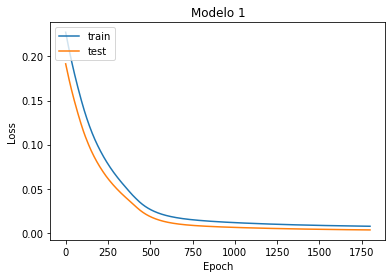

In [61]:
#Representación del modelo
plt.plot(Modelo_1.history['loss'])
plt.plot(Modelo_1.history['val_loss'])
plt.title('Modelo 1')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

:) Para enmarcar esta gráfica :)

MLP-MODEL - Prueba para luego hacer la concatenación de los modelos MLP + CNN

In [97]:
#Modelo 2 - Prueba para hacer concatenación de CNN + MLP 
#Utilizo otro optimizador para probar los resultados, cambié las épocas y el batch_size y la cantidad de neuronas
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(8, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(4, activation='relu'))
#model.add(Dense(1, activation='linear')) Se comenta para quedarnos con 4 neuronas y luego concatenar con CNN

opt = Adam(learning_rate=0.0001, decay=1e-6)
model.compile(loss="mean_squared_error", optimizer=opt)

print("[INFO]: Entrenando Red Neuronal...")
Modelo_2 = model.fit(X_train, y_train, shuffle=True, validation_data=(X_validation, y_validation), epochs=200, batch_size=450,verbose=2)

loss = model.evaluate(X_test, y_test)
print(f'Loss={loss}')


[INFO]: Entrenando Red Neuronal...
Epoch 1/200
2/2 - 1s - loss: 0.0700 - val_loss: 0.0633 - 874ms/epoch - 437ms/step
Epoch 2/200
2/2 - 0s - loss: 0.0689 - val_loss: 0.0622 - 61ms/epoch - 30ms/step
Epoch 3/200
2/2 - 0s - loss: 0.0678 - val_loss: 0.0610 - 42ms/epoch - 21ms/step
Epoch 4/200
2/2 - 0s - loss: 0.0667 - val_loss: 0.0599 - 53ms/epoch - 26ms/step
Epoch 5/200
2/2 - 0s - loss: 0.0656 - val_loss: 0.0589 - 46ms/epoch - 23ms/step
Epoch 6/200
2/2 - 0s - loss: 0.0646 - val_loss: 0.0578 - 36ms/epoch - 18ms/step
Epoch 7/200
2/2 - 0s - loss: 0.0635 - val_loss: 0.0567 - 42ms/epoch - 21ms/step
Epoch 8/200
2/2 - 0s - loss: 0.0625 - val_loss: 0.0557 - 49ms/epoch - 24ms/step
Epoch 9/200
2/2 - 0s - loss: 0.0615 - val_loss: 0.0546 - 40ms/epoch - 20ms/step
Epoch 10/200
2/2 - 0s - loss: 0.0605 - val_loss: 0.0536 - 37ms/epoch - 19ms/step
Epoch 11/200
2/2 - 0s - loss: 0.0595 - val_loss: 0.0526 - 54ms/epoch - 27ms/step
Epoch 12/200
2/2 - 0s - loss: 0.0585 - val_loss: 0.0516 - 39ms/epoch - 19ms/step


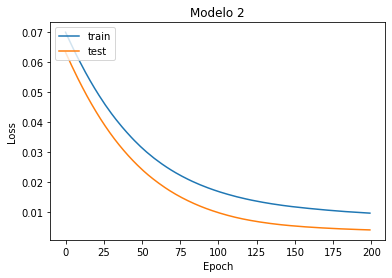

In [98]:
#Representación del modelo
#Vemos cómo nuestra gráfica cambia y tiene una caída drástica. Esto podría ser por dejar comentada la Densa de 
#una sola neurona. Esto está así para poder luego realizar la concatenaciónde los dos modelos MLP y CNN
plt.plot(Modelo_2.history['loss'])
plt.plot(Modelo_2.history['val_loss'])
plt.title('Modelo 2')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [101]:
#Modelo 3 - Otra prueba porque me gustó esta parte :) 
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(8, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss="mean_squared_error", optimizer='RMSProp')

print("[INFO]: Entrenando Red Neuronal...")
Modelo_3 = model.fit(X_train, y_train, shuffle=True, validation_data=(X_validation, y_validation), epochs=1600, batch_size=4000,verbose=2)

loss = model.evaluate(X_test, y_test)
print(f'Loss={loss}')

[INFO]: Entrenando Red Neuronal...
Epoch 1/1600
1/1 - 1s - loss: 0.1473 - val_loss: 0.1249 - 1s/epoch - 1s/step
Epoch 2/1600
1/1 - 0s - loss: 0.1223 - val_loss: 0.1101 - 77ms/epoch - 77ms/step
Epoch 3/1600
1/1 - 0s - loss: 0.1077 - val_loss: 0.0995 - 82ms/epoch - 82ms/step
Epoch 4/1600
1/1 - 0s - loss: 0.0973 - val_loss: 0.0911 - 44ms/epoch - 44ms/step
Epoch 5/1600
1/1 - 0s - loss: 0.0891 - val_loss: 0.0842 - 38ms/epoch - 38ms/step
Epoch 6/1600
1/1 - 0s - loss: 0.0825 - val_loss: 0.0783 - 38ms/epoch - 38ms/step
Epoch 7/1600
1/1 - 0s - loss: 0.0767 - val_loss: 0.0731 - 40ms/epoch - 40ms/step
Epoch 8/1600
1/1 - 0s - loss: 0.0717 - val_loss: 0.0685 - 44ms/epoch - 44ms/step
Epoch 9/1600
1/1 - 0s - loss: 0.0674 - val_loss: 0.0643 - 51ms/epoch - 51ms/step
Epoch 10/1600
1/1 - 0s - loss: 0.0634 - val_loss: 0.0604 - 38ms/epoch - 38ms/step
Epoch 11/1600
1/1 - 0s - loss: 0.0598 - val_loss: 0.0569 - 44ms/epoch - 44ms/step
Epoch 12/1600
1/1 - 0s - loss: 0.0566 - val_loss: 0.0536 - 53ms/epoch - 53ms

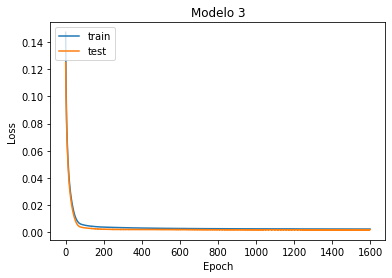

In [112]:
#Representación del modelo
plt.plot(Modelo_3.history['loss'])
plt.plot(Modelo_3.history['val_loss'])
plt.title('Modelo 3')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

El Modelo 3 es el que menos Loss tiene pero el modelo 1 tiene una gráfica más estable. Aquí podemos observar cómo al cambiar los optimizadores, la cantidad de neuronas, el batch size o el learning rate obtenemos mejoras en nuestros modelos. La cantidad de épocas también es determinante. En caso de tener tiempo para la ejecusión podemos poner más épocas para probar resultados. 

## **Imágenes (CNN - Red neuronal convolucional)**

In [103]:
df_Prueba_2 = df_Prueba

In [104]:
#Tamaño del DF Numéricos
df_Prueba.shape

(1000, 14)

In [105]:
#Tamaño del DF con Imágenes
images.shape

(1000, 224, 224, 3)

In [106]:
# Normalizamos las imagenes
images_normaliazdas=images/255.

In [107]:
images_normaliazdas.shape

(1000, 224, 224, 3)

In [108]:
#Reescalamos nuestras imágenes. De 224, 224 a 32,32
input_shape = (32, 32, 3)
images_R = []
for img in images:
  images_R.append(np.resize(img, input_shape))
  

images_R = np.array(images_R)
print(images_R.shape)

(1000, 32, 32, 3)


In [109]:
# Vamos a dividir en train y en test
from sklearn.model_selection import train_test_split


X_img_train, X_img_test, Y_img_train, Y_img_test = train_test_split(images_R, y_reg, test_size=0.2, random_state=1)
X_img_train, X_img_val, Y_img_train, Y_img_val = train_test_split(X_img_train, Y_img_train, test_size=0.25, random_state=1)

In [117]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten

# Inicializamos el modelo
cnn_model = Sequential()
# Definimos una capa convolucional
cnn_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

# Definimos una segunda capa convolucional
cnn_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

# Definimos una tercera capa convolucional
cnn_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))
# 
cnn_model.add(Flatten())
cnn_model.add(Dense(1024, activation='relu', kernel_constraint=max_norm(3.)))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='linear')) #Si queremos concatenar esta CNN con MLP, esta línea debe
#quedarse comentada para que nos quedemos con 4 neuronas con una activación Relu.

# Compilamos el modelo
opt=Adam(learning_rate=0.0001, decay=1e-6)
cnn_model.compile(loss='mean_squared_error', optimizer=opt)

# Entrenamos el modelo
modelo_A = cnn_model.fit(X_img_train, Y_img_train, batch_size=160,shuffle=True,epochs=100,validation_data=(X_img_val, Y_img_val)) 
# Evaluamos el modelo
loss = cnn_model.evaluate(X_img_test, Y_img_test)

print(f'Loss={loss}')


Epoch 1/100
4/4 [==============================] - 5s 1s/step - loss: 2274.3093 - val_loss: 104.4449
Epoch 2/100
4/4 [==============================] - 4s 957ms/step - loss: 1279.6709 - val_loss: 4.6506
Epoch 3/100
4/4 [==============================] - 4s 943ms/step - loss: 635.6126 - val_loss: 28.1095
Epoch 4/100
4/4 [==============================] - 4s 937ms/step - loss: 483.3017 - val_loss: 26.8033
Epoch 5/100
4/4 [==============================] - 4s 945ms/step - loss: 349.3936 - val_loss: 4.9546
Epoch 6/100
4/4 [==============================] - 4s 943ms/step - loss: 219.3424 - val_loss: 0.9787
Epoch 7/100
4/4 [==============================] - 4s 943ms/step - loss: 194.2473 - val_loss: 0.9114
Epoch 8/100
4/4 [==============================] - 4s 945ms/step - loss: 132.4928 - val_loss: 1.6055
Epoch 9/100
4/4 [==============================] - 4s 947ms/step - loss: 118.9280 - val_loss: 2.2245
Epoch 10/100
4/4 [==============================] - 4s 943ms/step - loss: 97.9800 - val_

Vemos como en cada época nuestro loss y val_loss va disminuyendo.

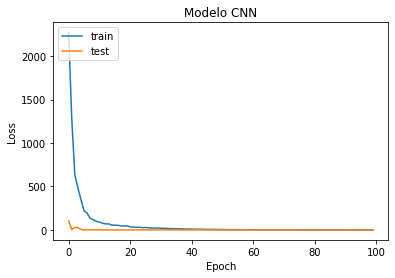

In [118]:
#Graficamos 
plt.plot(modelo_A.history['loss'])
plt.plot(modelo_A.history['val_loss'])
plt.title('Modelo CNN')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Concatenar MLP + CNN

In [ ]:
#from tensorflow.keras.layers import concatenate

#concatenate_input = concatenate([mlp_model.output, cnn_model.output])

#input=combinedInput.shape[1]



In [ ]:
model_hibrid = Sequential()
model_hibrid.add(Dense(4, input_dim=input, activation="relu"))
model_hibrid.add(Dense(1, activation="linear"))

# **VGG16 - Modelo híbrido (Numérico + Imágenes)**
Otra forma de hacerlo

In [119]:
# Como poder extraer características de las imágenes
# creamos un modelo para extraer el vector de características de nuestras imágenes
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model_base = VGG16(weights='imagenet', include_top=False)

# creamos un modelo añadiéndole la capa GlobalAveragePooling
x = model_base.output
gap = GlobalAveragePooling2D()(x)
model = Model(inputs=model_base.input, outputs=gap)

model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

In [120]:
images.shape

(1000, 224, 224, 3)

In [121]:
#Predicción de cada una de las imágenes
from tqdm import tqdm 
#Extracción  el vector de 512 características
images_feat = np.zeros((n_images, 512))

for i in tqdm(range(images.shape[0])):
    img = images[i]
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    images_feat[i] = features[0]

100%|██████████| 1000/1000 [09:44<00:00,  1.71it/s]


In [122]:
images_feat.shape

(1000, 512)

In [123]:
df_Prueba.shape

(1000, 14)

Concatenación (Númericas-Categóricas e Imágenes)

In [124]:
# Una forma de concatenar las características extraídas de las imágenes y datos numéricos sería:
# Vamos a juntar las features de las imagenes y el dataset numérico/categórico
import numpy as np
data_all = np.concatenate((df_Prueba, images_feat), axis=1) 
#siendo df_Prueba los datos numéricos y categóricos e images_feat las caracterísitcas de las imágenes

In [125]:
print(data_all.shape)

(1000, 526)


In [126]:
# Vamos a dividir en train y en test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_all, y_reg.values, test_size=0.2, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=20)

Modelo

In [129]:
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  

model.compile(loss='mean_squared_error', optimizer='RMSProp')

Modelo_Hibrido = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1000, batch_size=2000, verbose=2)

loss = model.evaluate(X_test, y_test)
print(f'Loss={loss}')


Epoch 1/1000
1/1 - 1s - loss: 6.8490 - val_loss: 57.7342 - 1s/epoch - 1s/step
Epoch 2/1000
1/1 - 0s - loss: 55.3313 - val_loss: 2.7083 - 56ms/epoch - 56ms/step
Epoch 3/1000
1/1 - 0s - loss: 1.8435 - val_loss: 2.5480 - 56ms/epoch - 56ms/step
Epoch 4/1000
1/1 - 0s - loss: 1.5686 - val_loss: 2.5293 - 61ms/epoch - 61ms/step
Epoch 5/1000
1/1 - 0s - loss: 1.3998 - val_loss: 2.5011 - 43ms/epoch - 43ms/step
Epoch 6/1000
1/1 - 0s - loss: 1.2453 - val_loss: 2.4412 - 46ms/epoch - 46ms/step
Epoch 7/1000
1/1 - 0s - loss: 1.1270 - val_loss: 2.3524 - 49ms/epoch - 49ms/step
Epoch 8/1000
1/1 - 0s - loss: 1.0307 - val_loss: 2.2623 - 32ms/epoch - 32ms/step
Epoch 9/1000
1/1 - 0s - loss: 0.9443 - val_loss: 2.1678 - 33ms/epoch - 33ms/step
Epoch 10/1000
1/1 - 0s - loss: 0.8653 - val_loss: 2.0953 - 53ms/epoch - 53ms/step
Epoch 11/1000
1/1 - 0s - loss: 0.7964 - val_loss: 2.0327 - 102ms/epoch - 102ms/step
Epoch 12/1000
1/1 - 0s - loss: 0.7384 - val_loss: 1.9835 - 151ms/epoch - 151ms/step
Epoch 13/1000
1/1 - 0s 

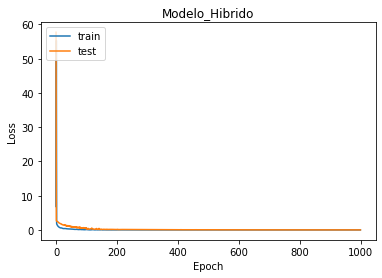

In [130]:
#Representación del modelo
plt.plot(Modelo_Hibrido.history['loss'])
plt.plot(Modelo_Hibrido.history['val_loss'])
plt.title('Modelo_Hibrido')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Conclusiones**
- La limpieza de los datos es determinante en los resultados que obtendremos en los modelos.
- Al cambiar los optimizadores, la cantidad de neuronas, el batch size o el learning rate podemos obtener mejoras en nuestros modelos. La cantidad de épocas también es determinante. En caso de tener tiempo para la ejecusión podemos poner más épocas para probar resultados.

En los 3 tipos de modelos (MLP, CNN y VGG16) se obtuvieron resultados buenos a pesar de la poca cantidad de datos que utilizamos. 
- **Resultados**:
  - MLP: Modelo 1 Loss=0.0060
  - MLP: Modelo 2 Loss=0.0075
  - **MLP: Modelo 3 Loss=0.0026**
  - CNN: Modelo A Loss=0.0134
  - Modelo-VGG16  Loss=0.0059

La cantidad de datos inicial no era tan grande sin embargo al realizar los modelos en los colabs se desconectaba la GPU y se llenaba la RAM, por lo que tuvimos que optar por estudiar solo 1000 muestras. 

Pude realizar los 3 modelos antes descritos pero por motivos de diferencia en las dimensiones y tiemplo no pude concatenar los modelos MLP (numéricos y categóricos) y CNN (imágenes)... Sin embargo el VGG16 híbrido si e individualmemte los resultados obtenidos son buenos, adicionalmente a esto pude observar el poder y capacidad que tiene el Deep Learning en comparación con el Machine Learning. 



